# User Churn Prediction

In this project,we use supervised learning models to identify whether users will stop the service in the future. And we also contribute to analyze the top factors in user churn.

# Contents
Part 1: Data exploration

Part 2: Feature Preprocessing

Part 3: Model Training and Model Evaluation

Part 4: Feature Importance


## Part 1: Data exploration
### Part 1.1: Understand the Raw dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

df = pd.read_csv('churn.all')
df.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [2]:
print ("Num of rows: " + str(df.shape[0])) # row count
print ("Num of columns: " + str(df.shape[1])) # column count
df.describe()

Num of rows: 5000
Num of columns: 21


,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,436.911400,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,39.69456,42.209182,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,408.000000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,415.000000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,415.000000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,510.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [3]:
#missing data
missing_df=df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['filling_factor'] = (df.shape[0] - missing_df['missing_count']) / df.shape[0] * 100
missing_df.sort_values('filling_factor').reset_index(drop = True)

,column_name,missing_count,filling_factor
0,state,0,100.0
1,total_intl_charge,0,100.0
2,total_intl_calls,0,100.0
3,total_intl_minutes,0,100.0
4,total_night_charge,0,100.0
5,total_night_calls,0,100.0
6,total_night_minutes,0,100.0
7,total_eve_charge,0,100.0
8,total_eve_calls,0,100.0
9,number_customer_service_calls,0,100.0


### Part 1.2: Data Cleaning

In [4]:
#Remove Extra Whitespace
df['voice_mail_plan'][0] # check categorical feature

' yes'

In [5]:
# Remove the heading and trailing whitespaces
df['voice_mail_plan'] = df['voice_mail_plan'].map(lambda x: x.strip())
df['intl_plan'] = df['intl_plan'].map(lambda x: x.strip())
df['churned'] = df['churned'].map(lambda x: x.strip())

In [6]:
df['voice_mail_plan'][0] # Check the categorical feature after manipulation

'yes'

### Part 1.3: Understand the Features

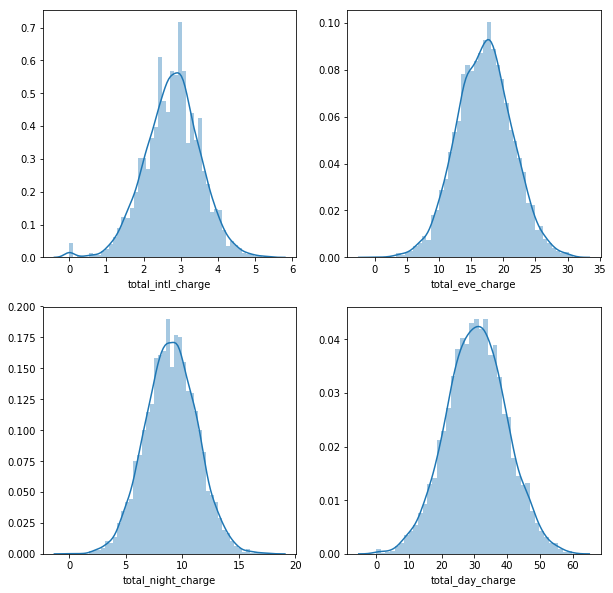

In [7]:
# check the feature distribution
fig=plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df['total_intl_charge'],kde=True)
plt.subplot(2,2,2)
sns.distplot(df['total_eve_charge'],kde=True)
plt.subplot(2,2,3)
sns.distplot(df['total_night_charge'],kde=True)
plt.subplot(2,2,4)
sns.distplot(df['total_day_charge'],kde=True)
plt.show()

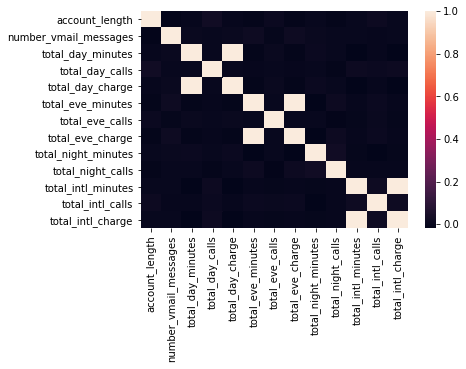

In [8]:
# correlations between all the features
corr = df[["account_length", "number_vmail_messages", "total_day_minutes",
                    "total_day_calls", "total_day_charge", "total_eve_minutes",
                    "total_eve_calls", "total_eve_charge", "total_night_minutes",
                    "total_night_calls", "total_intl_minutes", "total_intl_calls",
                    "total_intl_charge"]].corr()

# show heapmap of correlations
sns.heatmap(corr)

## Part 2: Feature Preprocessing

In [9]:
df.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [28]:
# Get ground truth data
y = np.where(df['churned'] == 'True.',1,0)

# Drop some useless columns
#to_drop = ['area_code','phone_number','churned']
df_new = df.drop(['area_code','phone_number','churned'], axis=1)

# yes and no have to be converted to boolean values
yes_no_col = ["intl_plan","voice_mail_plan"]
df_new[yes_no_col] = df_new[yes_no_col] == 'yes'

#Transfer categorical feature into numerical feature
df_new= pd.get_dummies(df_new, columns=['state'])
df_new.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,107,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,137,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,84,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,75,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
x=df_new
scaler = MinMaxScaler()
df_new=scaler.fit_transform(x)

print ("Feature space holds %d observations and %d features" % x.shape)
print ("Unique target labels:", np.unique(y))
print (pd.DataFrame(x).head())

Feature space holds 5000 observations and 68 features
Unique target labels: [0 1]
   account_length  intl_plan  voice_mail_plan  number_vmail_messages  \
0             128      False             True                     25   
1             107      False             True                     26   
2             137      False            False                      0   
3              84       True            False                      0   
4              75       True            False                      0   

   total_day_minutes  total_day_calls  total_day_charge  total_eve_minutes  \
0              265.1              110             45.07              197.4   
1              161.6              123             27.47              195.5   
2              243.4              114             41.38              121.2   
3              299.4               71             50.90               61.9   
4              166.7              113             28.34              148.3   

   total_eve_cal

D:\anocando1\envs\homework1\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [64]:
#check the churned proportion
churn_pro=y.sum()/y.shape
churn_pro

array([0.1414])

## Part 3: Model Training and Model Evaluation
### Part 3.1: Split Dataset

In [30]:
# Splite data into training and testing
from sklearn import model_selection

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y)

print('training data has %d observation with %d features'% x_train.shape)
print('test data has %d observation with %d features'% x_test.shape)

training data has 3750 observation with 68 features
test data has 1250 observation with 68 features


### Part 3.2: Model Training and Selection

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
classifier_logistic = LogisticRegression()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier()

In [32]:
# Use 5-fold Cross Validation to get the accuracy for different models
model = ['Logistic Regression','KNN','Random Forest']
model_list = [classifier_logistic, classifier_KNN, classifier_RF]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, x_train, y_train, cv=5)
    print('Model accuracy of %s is: %.3f'%(model[count],cv_score.mean()))
    count += 1

Model accuracy of Logistic Regression is: 0.861
Model accuracy of KNN is: 0.876
Model accuracy of Random Forest is: 0.926


### Part 3.3: Grid Search一Optimal Hyperparameters

In [33]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results 
def best_grid_search_metrics(input_search_model):
    print ("Best score: %0.3f" % input_search_model.best_score_)
    print ("Best parameters:")
    best_parameters = input_search_model.best_params_
    for param in parameters.keys():
        print("\t%s: %r" % (param, best_parameters[param]))

#### Part 3.3.1: Find Optimal Hyperparameters - LogisticRegression

In [34]:
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(1, 3, 7,10)
}
Grid_LR = GridSearchCV(classifier_logistic,parameters, cv=5)
Grid_LR.fit(x_train, y_train)
best_grid_search_metrics(Grid_LR)

Best score: 0.864
Best parameters:
	penalty: 'l1'
	C: 1


In [35]:
# best model
best_LR_model = Grid_LR.best_estimator_

#### Part 3.3.2: Find Optimal Hyperparameters - KNeighbors

In [36]:
parameters = {
    'n_neighbors':[2,5,9,12] 
}
Grid_KNN = GridSearchCV(classifier_KNN,parameters, cv=5)
Grid_KNN.fit(x_train, y_train)
best_grid_search_metrics(Grid_KNN)

Best score: 0.879
Best parameters:
	n_neighbors: 9


In [37]:
# best model
best_KNN_model = Grid_KNN.best_estimator_

#### Part 3.3.3: Find Optimal Hyperparameters - Random Forest

In [38]:
parameters = {
    'n_estimators' : [40,50,60,70]
}
Grid_RF = GridSearchCV(classifier_RF,parameters, cv=5)
Grid_RF.fit(x_train, y_train)
best_grid_search_metrics(Grid_RF)

Best score: 0.944
Best parameters:
	n_estimators: 50


In [39]:
# best model
best_RF_model = Grid_RF.best_estimator_

### Part 3.4: Model Evaluation
#### Part 3.4.1: Confusion Matrix 

In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Calculate accuracy, precision and recall
def eval_calculation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is: %0.3f" % accuracy)
    print ("precision is: %0.3f" % precision)
    print ("recall is: %0.3f" % recall)

# print out confusion matrix
def draw_confusion_matrix(confusion_matrix):
    names = ['Not_churn','Churn']
    for x in confusion_matrix:
        classifier, cm = x[0], x[1]
        eval_calculation(classifier, cm)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion Matrix of %s' % classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + names)
        ax.set_yticklabels([''] + names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

Logistic Regression
Accuracy is: 0.868
precision is: 0.500
recall is: 0.218


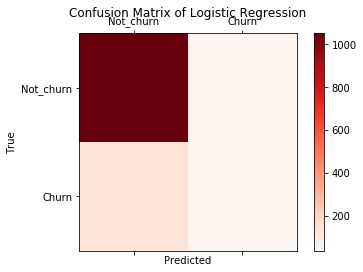

KNeighbors
Accuracy is: 0.904
precision is: 0.846
recall is: 0.333


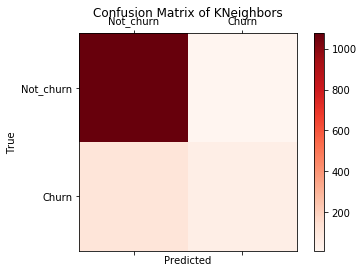

Random Forest
Accuracy is: 0.956
precision is: 0.951
recall is: 0.703


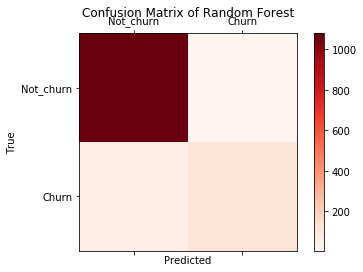

In [53]:
# Confusion matrix, accuracy, precison and recall for random forest and logistic regression
confusion_matrix = [
    ("Logistic Regression", confusion_matrix(y_test,best_LR_model.predict(x_test))),
    ("KNeighbors", confusion_matrix(y_test,best_KNN_model.predict(x_test))),
    ("Random Forest", confusion_matrix(y_test,best_RF_model.predict(x_test))),
]

draw_confusion_matrix(confusion_matrix)

#### Part 3.4.2: Model Evaluation - ROC & AUC

In [54]:
from sklearn.metrics import roc_curve
from sklearn import metrics

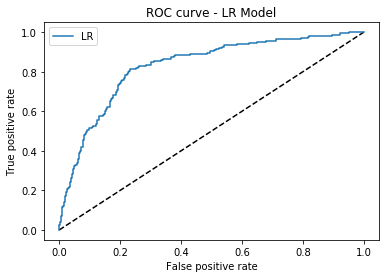

0.8289177489177488

In [55]:
#ROC of LR Model
y_pred_LR = best_LR_model.predict_proba(x_test)[:, 1]
fpr_LR, tpr_LR, _ = roc_curve(y_test, y_pred_LR)

# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_LR, tpr_LR, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR Model')
plt.legend(loc='best')
plt.show()

# AUC score
metrics.auc(fpr_LR,tpr_LR)

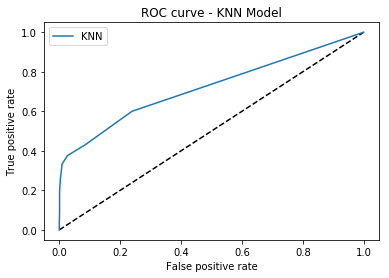

0.7201591956430666

In [56]:
#ROC of KNN Model
y_pred_KNN = best_KNN_model.predict_proba(x_test)[:, 1]
fpr_KNN, tpr_KNN, _ = roc_curve(y_test, y_pred_KNN)

# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_KNN, tpr_KNN, label='KNN')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - KNN Model')
plt.legend(loc='best')
plt.show()

# AUC score
metrics.auc(fpr_KNN,tpr_KNN)

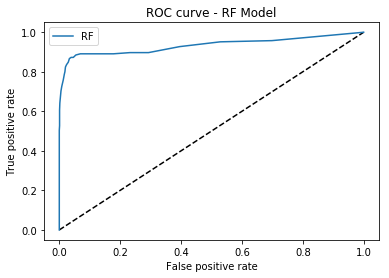

0.9330289065772936

In [57]:
#ROC of RF Model
y_pred_FR = best_RF_model.predict_proba(x_test)[:, 1]
fpr_FR, tpr_FR, _ = roc_curve(y_test, y_pred_FR)

# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_FR, tpr_FR, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF Model')
plt.legend(loc='best')
plt.show()

# AUC score
metrics.auc(fpr_FR,tpr_FR)

## Part 4: Feature Importance

In [58]:
#Random forest(RF) shows the best prediction accuracy. Therefore, the feature importance will be extracted from the RF model. 
forest = RandomForestClassifier()
forest.fit(x, y)

importances = forest.feature_importances_

# Print the feature ranking
print("Feature importance rank of random forest model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), x.columns), reverse=True):
    print (v + ": " + str(k))

Feature importance rank of random forest model:
total_day_minutes: 0.1445
total_day_charge: 0.128
number_customer_service_calls: 0.0957
intl_plan: 0.0705
total_eve_charge: 0.0698
total_eve_minutes: 0.0589
total_intl_minutes: 0.0502
total_intl_calls: 0.0483
total_night_minutes: 0.039
total_night_calls: 0.0316
total_night_charge: 0.0305
total_day_calls: 0.0286
total_intl_charge: 0.0284
account_length: 0.0281
number_vmail_messages: 0.0257
total_eve_calls: 0.0216
voice_mail_plan: 0.0133
state_WA: 0.0036
state_MS: 0.0036
state_CA: 0.0035
state_AR: 0.0035
state_TX: 0.0034
state_NJ: 0.0033
state_MT: 0.0031
state_DE: 0.0026
state_NV: 0.0025
state_ND: 0.0025
state_ME: 0.0025
state_SC: 0.0024
state_MD: 0.0024
state_WV: 0.0022
state_NY: 0.0022
state_MI: 0.0022
state_MA: 0.0022
state_ID: 0.0021
state_LA: 0.002
state_SD: 0.0018
state_NC: 0.0018
state_KS: 0.0018
state_AZ: 0.0018
state_OR: 0.0017
state_UT: 0.0016
state_CO: 0.0016
state_NM: 0.0015
state_FL: 0.0015
state_RI: 0.0013
state_IN: 0.0013
sta

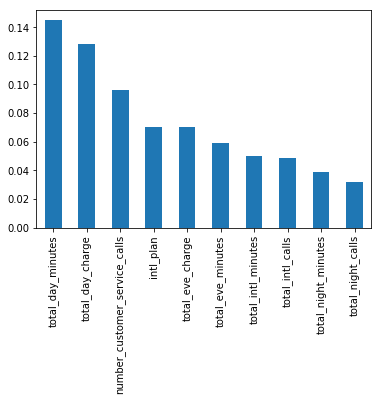

In [60]:
feat_importances = pd.Series(importances, index=x.columns[:68])
feat_importances.nlargest(10).plot(kind='bar')